## Business Case A****** Hospitals

### Context

A***** Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, A***** Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at A***** 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help A***** hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

### To Identify,

>>Requirement: 

In the event of Covid 19 we need to identify the paramenters of Delhi patients for their hospitalization 

* Which variables are significant in predicting the reason for hospitalization for different regions


* How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\DSML\scaler_apollo_hospitals.csv")

In [5]:
df.shape

(1338, 8)

In [6]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [7]:
df.describe(include="all")

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,NaN,2,2,4,NaN,NaN,NaN
top,NaN,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,NaN,676,1064,364,NaN,NaN,NaN
mean,668.500000,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,386.391641,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,0.000000,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [8]:
## lets check for any null values

df.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [9]:
## unnamed col does not make any meaning so dropping the column

df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [102]:
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


* ## Univariate Analysis

<AxesSubplot:ylabel='Frequency'>

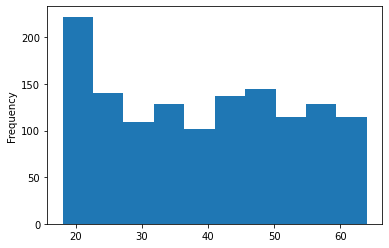

In [103]:
## lets Explore each column

df["age"].plot(kind = "hist")

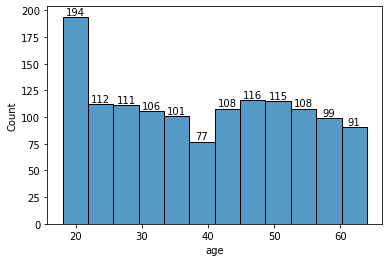

In [104]:
ax = sns.histplot(x='age',  data=df)
for container in ax.containers:
    ax.bar_label(container)

In [113]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:>

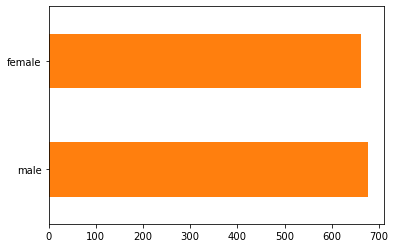

In [112]:
df["sex"].value_counts().plot(kind = "barh", color = "C1", )

In [119]:
print(df["smoker"].value_counts(normalize=True))
print(df["smoker"].value_counts())


no     0.795217
yes    0.204783
Name: smoker, dtype: float64
no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:>

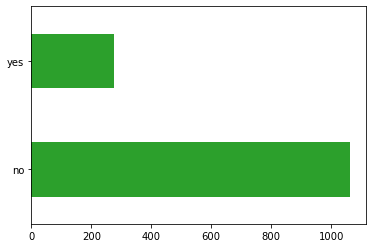

In [106]:
df["smoker"].value_counts().plot(kind = "barh", color = "C02", )

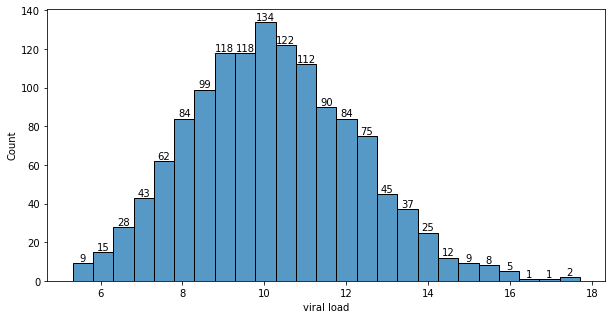

In [107]:
plt.figure(figsize=(10,5))
ax = sns.histplot(x='viral load',  data=df, )
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='viral load'>

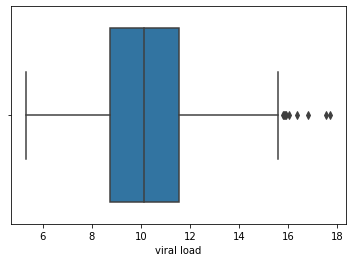

In [129]:
sns.boxplot(x=df["viral load"])

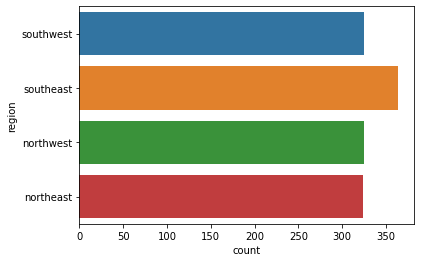

In [116]:
sns.countplot(y='region', data=df)
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:>

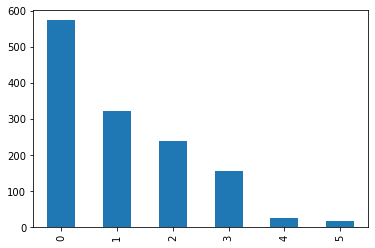

In [108]:
df["severity level"].value_counts().plot(kind = "bar", )

In [127]:
df["severity level"].value_counts(normalize=True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: severity level, dtype: float64

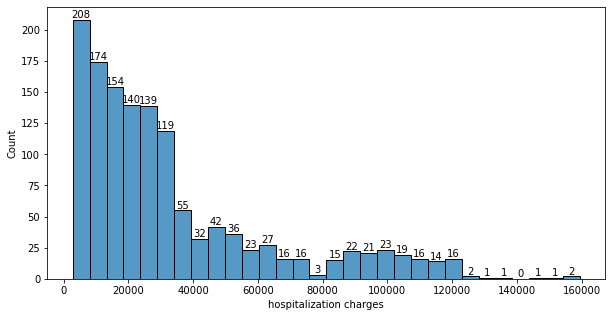

In [126]:
plt.figure(figsize=(10,5))
ax = sns.histplot(x='hospitalization charges',  data=df, )
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='hospitalization charges'>

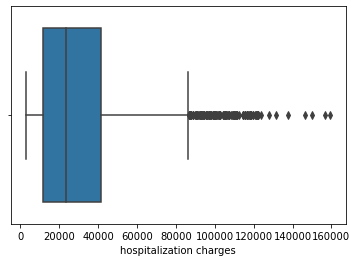

In [128]:
sns.boxplot(x=df["hospitalization charges"])

* ## Observation 

> There are no nul values in data

> Females and males present in the data is almost same  with 662 and 672 respectively

> Majority of the patients are non smokers 1064 to be exact and 274 smokers to be exact

> Southeast region of delhi have sightly more patients and rest other regions hav almot same no. of patients

> mean Viral load is 10.21

> 42 percent of the patients are of "0" level severity and 1.3 percent are of "5" level severity

> Hospitalization charges has large no of outliers 

* ## Bivariate Analysis

In [8]:
df_2 = df

In [12]:
df["age"].max()

64

In [15]:
df_2['age_grps'] = pd.cut(x=df_2['age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=['10s','20s', '30s', '40s','50s', "60s"])

In [18]:
df_2["age_grps"].value_counts()

40s    281
20s    278
50s    265
30s    257
10s    166
60s     91
Name: age_grps, dtype: int64

<AxesSubplot:xlabel='age_grps', ylabel='hospitalization charges'>

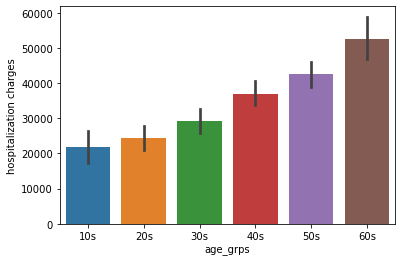

In [23]:
sns.barplot(data = df_2, x = "age_grps", y = "hospitalization charges")

<AxesSubplot:xlabel='age_grps', ylabel='hospitalization charges'>

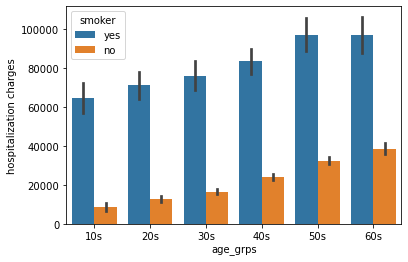

In [24]:
sns.barplot(data = df_2, x = "age_grps", y = "hospitalization charges", hue = "smoker")

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

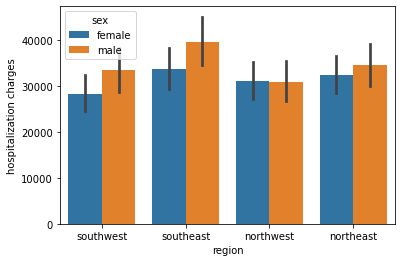

In [135]:
sns.barplot(data = df, x = "region", y = "hospitalization charges", hue = "sex")

<Figure size 1080x720 with 0 Axes>

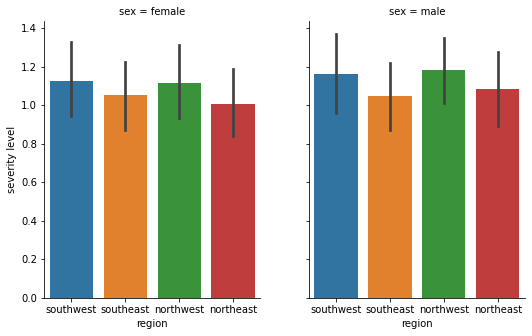

In [15]:
plt.figure(figsize=(15,10))
g = sns.catplot(data=df, x="region", y="severity level", col="sex",
    kind="bar", height=4, aspect=.6,)
g.fig.set_figwidth(8.27)
g.fig.set_figheight(5)

<AxesSubplot:xlabel='region', ylabel='viral load'>

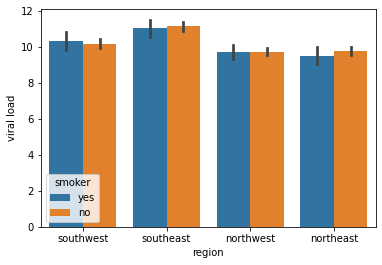

In [61]:
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x = "region", y = "viral load", data = df, hue= "smoker", )


In [54]:
df["severity level"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

<AxesSubplot:xlabel='hospitalization charges', ylabel='viral load'>

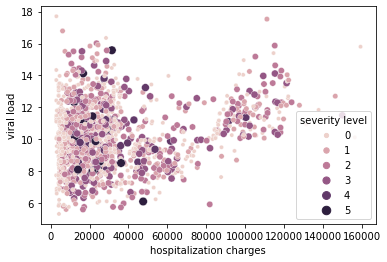

In [57]:
sns.scatterplot(data=df, x="hospitalization charges", y="viral load", hue="severity level", size="severity level")

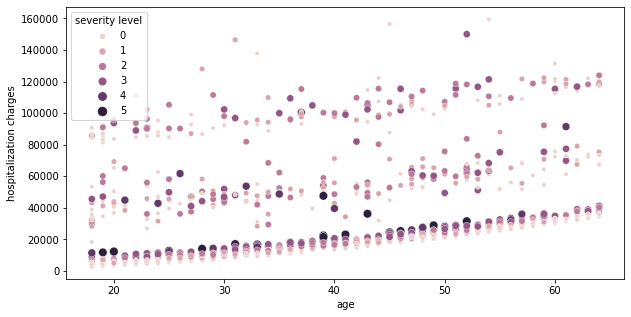

In [142]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, y="hospitalization charges", x="age", hue="severity level", size="severity level")

plt.show()

<Figure size 1080x720 with 0 Axes>

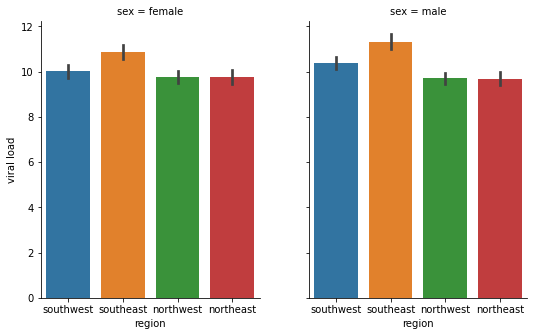

In [17]:
plt.figure(figsize=(15,10))
g = sns.catplot(data=df, x="region", y="viral load", col="sex",
    kind="bar", height=4, aspect=.6,)
g.fig.set_figwidth(8.27)
g.fig.set_figheight(5)

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

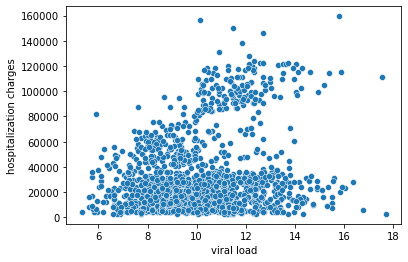

In [134]:
sns.scatterplot(data=df, x="viral load", y="hospitalization charges", )

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

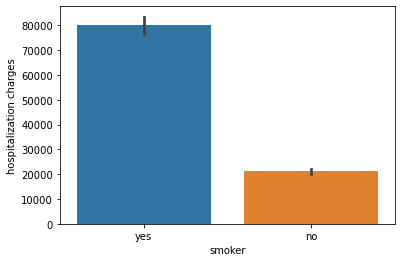

In [136]:
sns.barplot(data = df, y = "hospitalization charges", x = "smoker")

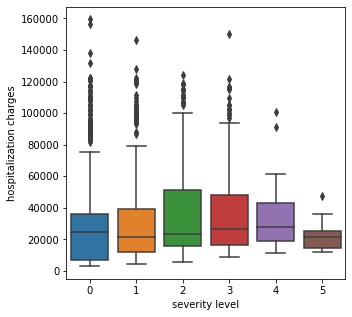

In [139]:
plt.figure(figsize=(5,5))
sns.boxplot(x="severity level", y="hospitalization charges", data = df)
plt.show()

<AxesSubplot:xlabel='viral load', ylabel='region'>

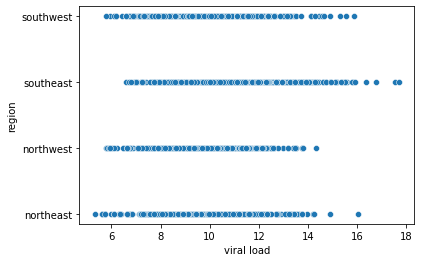

In [62]:
sns.scatterplot(data=df, x="viral load", y="region", )

<AxesSubplot:xlabel='severity level', ylabel='smoker'>

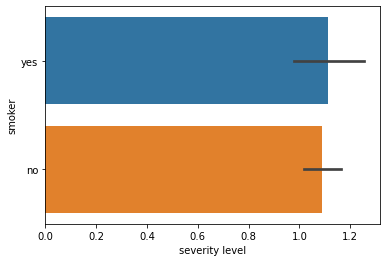

In [150]:
sns.barplot(data=df, x="severity level", y="smoker", )

<AxesSubplot:xlabel='viral load', ylabel='smoker'>

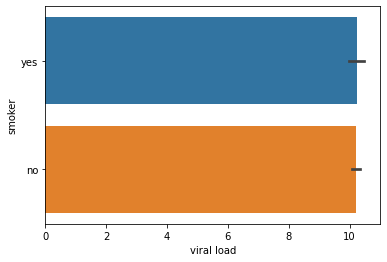

In [151]:
sns.barplot(data=df, x="viral load", y="smoker", )

* ## Observation 

> hospitalization charges have a linear relationship with age groups, similarly linear for gender and smokers

> Observing South east region of Delhi has with most hospitalization charges with both genders

> South east region of Delhi has observed high ranges of viral load among both males and females 

> hospitalization charges among smokers is significantly higher than non smokers

> severity level 2 has high hospitalization charges with its 25 percentile and 75 percentile comparatively higher than others

> viral load among smokers and non smokers is alomst same

> severity level among smokers is slightly high

## Detecting outliers
> In viral load, Hospitalization charges

<AxesSubplot:>

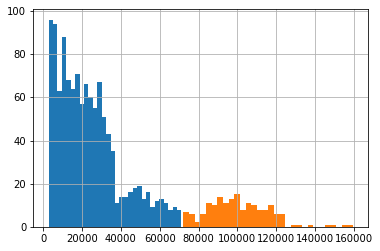

In [129]:
def detect_outliers(d):
    iqr = d.quantile(0.75) - d.quantile(0.25)
    upper = d.quantile(0.75) + 1*iqr
    lower = d.quantile(0.25) - 1*iqr
    return d.loc[(d < lower) | (d > upper)]


ol = detect_outliers(df['hospitalization charges'])
df.loc[~df.index.isin(ol.index)]['hospitalization charges'].hist(bins=30)
ol.hist(bins=30)

<AxesSubplot:>

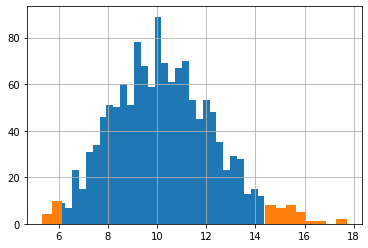

In [130]:


ol = detect_outliers(df['viral load'])
df.loc[~df.index.isin(ol.index)]['viral load'].hist(bins=30)
ol.hist(bins=30)

## Oservation
> There are some outliers in hospitalization charges and viral load

> We will not delete and changes the outlier values with mean or mode as dataset is very small and any such changes to such small data might affect it negatively

<AxesSubplot:>

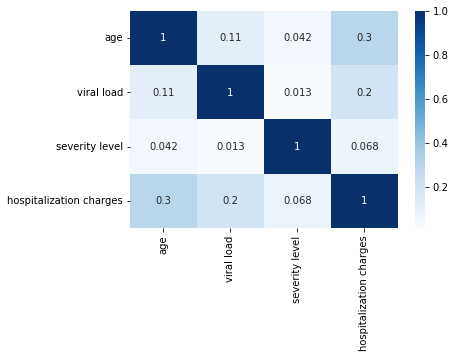

In [144]:
sns.heatmap(data = df.corr(), annot=True, cmap="Blues")

### Comment

No high correlation among continous variables

=======================================================================================================================

## Statistical Analysis

## 1. Chi squared
###  Is the proportion of smoking significantly different across different regions? (Chi-square)

Null Hypothesis Ho

> Proportion of smoking is same across different regions of Delhi

Alternate Hypothesis

> There is significant difference of smoking amon different regions of Delhi

In [12]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
pd.crosstab(index=df['region'], columns=df['smoker'], margins=True)

smoker,no,yes,All
region,,,
northeast,257,67,324
northwest,267,58,325
southeast,273,91,364
southwest,267,58,325
All,1064,274,1338


In [15]:
from scipy.stats import chi2_contingency
# defining the table
data = [[257, 267, 273, 267], [67, 58, 91, 58], [324, 325, 364, 325]]
stat, p, dof, expected = chi2_contingency(data)

In [16]:
p

0.2902469059220768

In [17]:
expected

array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
       [ 66.34977578,  66.55455904,  74.54110613,  66.55455904],
       [324.        , 325.        , 364.        , 325.        ]])

In [19]:
alpha = 0.05
p
if p < alpha:
    print("Reject Ho. Accept Ha")
else:
    
    print("Accept Ho, fail to reject the null hypothesis")

Accept Ho, fail to reject he null hypothesis


### Test Observation and Conlusion

>> Proportion of smoking is same across different regions of Delhi
There is no difference in smoking patterns in diifferent regions of Delhi

========================================================================================================================

## 2. Annova

### Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? 


>> A one-way ANOVA (“analysis of variance”) is used to determine whether or not there is a statistically significant difference between the means of three viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level.

Null Hypothesis Ho

> Similarity in means of viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level.

Alternate Hypothesis

> There is significant difference in means of viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level

In [77]:
## stats model library
from scipy.stats import f_oneway

In [59]:
df_fml = df[df["sex"] == "female"]

In [60]:
df_fml

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
7,37,female,no,northwest,9.25,3,18204
9,60,female,no,northwest,8.61,0,72308
...,...,...,...,...,...,...,...
1332,52,female,no,southwest,14.90,3,28529
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [65]:
df2 = df_fml[ (df_fml['severity level'] < 3) ]

In [66]:
df2["severity level"].value_counts()

0    289
1    158
2    119
Name: severity level, dtype: int64

In [157]:
df_fml["severity level"].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: severity level, dtype: int64

In [68]:
df2

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
9,60,female,no,northwest,8.61,0,72308
11,62,female,yes,southeast,8.76,0,69522
...,...,...,...,...,...,...,...
1331,23,female,no,southwest,11.13,0,26990
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


severity level
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: viral load, dtype: object

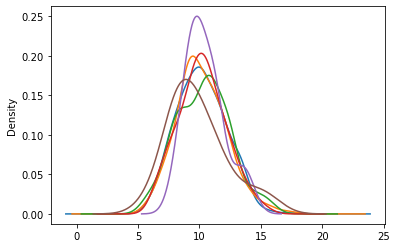

In [84]:
df.groupby('severity level')['viral load'].plot(kind='kde')

<AxesSubplot:>

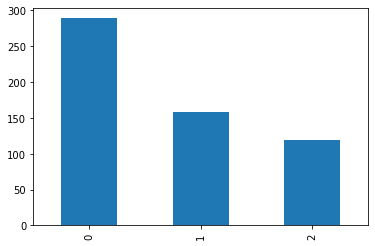

In [75]:
df2["severity level"].value_counts().plot(kind = "bar")

In [88]:
cat_1 = df2.loc[df2['severity level'] == 0]['viral load'].values
cat_2 = df2.loc[df2['severity level'] == 1]['viral load'].values
cat_3 = df2.loc[df2['severity level'] == 2]['viral load'].values
# cat_4 = df.loc[df['weather'] == 4]['count'].values
# f_oneway(cat_1, cat_2, cat_3, cat_4)

In [89]:
f_oneway(cat_1, cat_2, cat_3)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

In [93]:
pvalue= 0.7151189650367746
alpha = 0.05
if pvalue < alpha:
    print("Reject Ho, there is no similarity in means of three viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level.")
else:
    print("Accept Ho, there is similarity in means of three viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level.")

Accept Ho, there is similarity in means of three viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level.


Similarity in means of viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level.
### Test Observation and Conlusion

>> there is similarity in means of three viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level.

>> We cannot rely on viral load to be decisive in identifying the severity of the female patients with severity 0, 1, 2. and must identify a better parameter to relate the sevrity

===================================================================================================================

## 3. T Test two tailed

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

Null Hypothesis Ho

> gender does not have an effect on viral load

Alternate Hypothesis

> There is significant effect of gender on viral load

In [100]:
df.groupby("sex")["viral load"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,10.126073,2.015402,5.60,8.71,10.035,11.4375,16.02
male,676.0,10.314423,2.046889,5.32,8.80,10.230,11.6625,17.71


In [98]:
male_sample = df[df['sex'] == 'male']['viral load'].sample(650)
female_sample = df[df['sex'] == 'female']['viral load'].sample(650)

In [107]:
from scipy.stats import ttest_ind
import scipy.stats as stats


teststats, p_val = ttest_ind(male_sample, female_sample, equal_var=True)

In [108]:
print(teststats)
print(p_val)

1.584514362225864
0.11332030427660632


In [109]:
stats.ttest_ind(a=(np.log(male_sample)), b=(np.log(female_sample)), equal_var=True)

Ttest_indResult(statistic=1.5725598107894014, pvalue=0.11606448548088064)

In [154]:
alpha = 0.05
p_val = 0.11606
if p_val < alpha:
    print("Reject Ho. Accept Ha")
else:
    
    print("Accept Ho, fail to reject the null hypothesis")

Accept Ho, fail to reject the null hypothesis


### Test Observation and Conlusion

>> gender does not have an effect on viral load.
>> Viral load seems to be independent of gender and affecting males and females in similar way

======================================================================================================================

## Test 4.


Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

Assumption: As only "Hospitaization" is mentioned  we will take hospitalization charges to identify if there is any difference

Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?

* Mean sample Hospitalization charges of people smoking is 80125.57

* Mean sample Hospitalization charges of people not smoking is 21085.67

Null Hypothesis Ho

> The hospitalization charges of people smoking is less than or equal to mean of 80125.57 : <= 80125.57

Alternate Hypothesis H1

> The hospitalization charges of people smoking is more than 80125.57 : > 80125.57

      The population mean is greater than 80125.57 

In [110]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [114]:
df.groupby("smoker")["hospitalization charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,21085.675752,14984.455500,2805.0,9966.25,18363.5,28407.25,92277.0
yes,274.0,80125.572993,28853.891137,32074.0,52065.50,86141.0,102548.25,159426.0


In [118]:
df_smoker = df[df["smoker"] == "yes"]

In [120]:
df_smoker["hospitalization charges"].mean()

80125.57299270073

In [121]:
df_non_smoker = df[df["smoker"] == "no"]

In [122]:
df_non_smoker["hospitalization charges"].mean()

21085.6757518797

In [158]:
df["hospitalization charges"].mean()

33176.058295964125

In [127]:
# perform one sample t-test
t_statistic, p_value = stats.ttest_1samp(a=df_smoker["hospitalization charges"], popmean=80125.57)
print(t_statistic , p_value)

1.7168572298682636e-06 0.9999986313999911


In [156]:
alpha = 0.05
p_val = 0.999
if p_val < alpha:
    print("Reject Ho. Accept Ha")
else:
    
    print("Accept Ho, fail to reject the null hypothesis")

Accept Ho, fail to reject the null hypothesis


### Test Observation and Conlusion

>> Smokers have higher hospitalization charges than sample mean .


### Insights and Recommendation
> Hospitalization charges for smokers are higher than non smokers as smoking might result in underlying health complications

> Viral load seems to be independent of gender and affecting males and females in similar way

> We cannot rely on viral load to be decisive in identifying the severity of the female patients with severity 0, 1, 2. and must identify a better parameter to relate the sevrity

> Proportion of smoking is same across different regions of Delhi There is no difference in smoking patterns in different regions of Delhi

> Hospitalization charges are very linear for age groups

### Recommendations

> Raise health awareness among smokers for healthy life choices as they are spending significantly more money in hospitalization 

> Need to identify parameters leading severity ( high) among patients viral load cannot be considered.

> As viral load is independent of gender, everyone must adopt strict covid protocols

> Ideal for smokers to have health coverage

> people in age group of 60s are at most vulnerable and have most hospitalization charges